In [1]:
!pip install spacy


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.5 MB/s eta 0:00:05
     ----- ---------------------------------- 1.8/12.8 MB 4.5 MB/s eta 0:00:03
     --------- ------------------------------ 2.9/12.8 MB 4.6 MB/s eta 0:00:03
     --------- ------------------------------ 3.1/12.8 MB 4.2 MB/s eta 0:00:03
     ------------ --------------------------- 3.9/12.8 MB 3.6 MB/s eta 0:00:03
     ------------- -------------------------- 4.5/12.8 MB 3.4 MB/s eta 0:00:03
     -------------- ------------------------- 4.7/12.8 MB 3.2 MB/s eta 0:00:03
     ---------------- ----------------------- 5.2/12.8 MB 2.9 MB/s eta 0:00:03
     ------------------ --------------------- 5.8/12.8 MB 3.0 MB/s eta 0:00:03
     ------------------- -------------------- 6.3/12.8 MB 2.9 MB/s eta 0:00:03
     ---------------------- ----------------- 7.1/12.8 MB 2.8 MB/s eta 0:00:03
     -------------------------- ------------- 8.4/12.8 MB 3


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\Sahil\AppData\Roaming\nltk_data...
[

True

In [4]:
import spacy
nlp= spacy.load('en_core_web_sm')
import wordcloud
import string

In [5]:
!pip install emoji


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
import emoji

tqdm.pandas()

#  NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Sahil\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [7]:
df=pd.read_excel('P597 DATASET.xlsx')

In [8]:
df.head()

,title,rating,body
0,Horrible product,1,Very disappointed with the overall performance...
1,Camera quality is not like 48 megapixel,3,Camera quality is low
2,Overall,4,"Got the mobile on the launch date,Battery must..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp..."


In [9]:
df['text'] = df['title'].fillna('') + ' ' + df['body'].fillna('')

In [10]:
df.head()

,title,rating,body,text
0,Horrible product,1,Very disappointed with the overall performance...,Horrible product Very disappointed with the ov...
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Camera quality is not like 48 megapixel Camera...
2,Overall,4,"Got the mobile on the launch date,Battery must...","Overall Got the mobile on the launch date,Batt..."
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,A big no from me 1. It doesn't work with 5.0GH...
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Put your money somewhere else Not worth buying...


In [11]:
!pip install deep-translator


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
from deep_translator import GoogleTranslator

In [13]:
translator = GoogleTranslator(source='auto', target='en')

# Translate each row
def safe_translate(text):
    try:
        if isinstance(text, str) and text.strip():
            return translator.translate(text)
        else:
            return text
    except Exception as e:
        print(f"Translation failed: {e}")
        return text

In [14]:
from tqdm import tqdm
tqdm.pandas()
df['translated_text'] = df['text'].progress_apply(safe_translate)

100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [13:32<00:00,  1.77it/s]


In [15]:
def remove_emojis(text):
    return emoji.replace_emoji(text, replace='')

def clean_text(text):
    text = str(text)
    text = remove_emojis(text)                  # remove emojis
    text = text.lower()                         # lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)    # remove punctuation & numbers
    text = re.sub(r'\s+', ' ', text).strip()   # remove extra spaces
    return text

df['clean_text'] = df['translated_text'].progress_apply(clean_text)

100%|█████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:03<00:00, 407.66it/s]


In [16]:
def preprocess_tokens(text):
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(t) for t in tokens if t not in stop_words]
    return " ".join(tokens)

df['processed_text'] = df['clean_text'].progress_apply(preprocess_tokens)

100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:17<00:00, 80.34it/s]


In [17]:
df.head()

,title,rating,body,text,translated_text,clean_text,processed_text
0,Horrible product,1,Very disappointed with the overall performance...,Horrible product Very disappointed with the ov...,Horrible product Very disappointed with the ov...,horrible product very disappointed with the ov...,horrible product disappointed overall performa...
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Camera quality is not like 48 megapixel Camera...,Camera quality is not like 48 megapixel Camera...,camera quality is not like megapixel camera qu...,camera quality like megapixel camera quality low
2,Overall,4,"Got the mobile on the launch date,Battery must...","Overall Got the mobile on the launch date,Batt...","Overall Got the mobile on the launch date,Batt...",overall got the mobile on the launch datebatte...,overall got mobile launch datebattery must app...
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,A big no from me 1. It doesn't work with 5.0GH...,A big no from me 1. It doesn't work with 5.0GH...,a big no from me it doesnt work with ghz wifi ...,big doesnt work ghz wifi frequency ghz old sch...
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Put your money somewhere else Not worth buying...,Put your money somewhere else Not worth buying...,put your money somewhere else not worth buying...,put money somewhere else worth buyingfaulty so...


In [20]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity
    # Thresholds for polarity: (-1 negative .. 0 neutral .. +1 positive)
    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['processed_text'].progress_apply(get_sentiment)

100%|████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:01<00:00, 1112.06it/s]


In [21]:
#Exploratory Data Analysis (EDA)

In [22]:
print(df.info())
print(df['sentiment'].value_counts())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   title            1440 non-null   object
 1   rating           1440 non-null   int64 
 2   body             1440 non-null   object
 3   text             1440 non-null   object
 4   translated_text  1440 non-null   object
 5   clean_text       1440 non-null   object
 6   processed_text   1440 non-null   object
 7   sentiment        1440 non-null   object
dtypes: int64(1), object(7)
memory usage: 90.1+ KB
None
sentiment
positive    929
neutral     261
negative    250
Name: count, dtype: int64
title              0
rating             0
body               0
text               0
translated_text    0
clean_text         0
processed_text     0
sentiment          0
dtype: int64


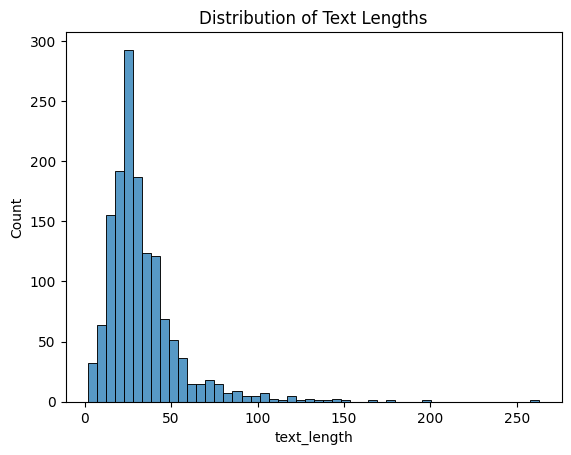

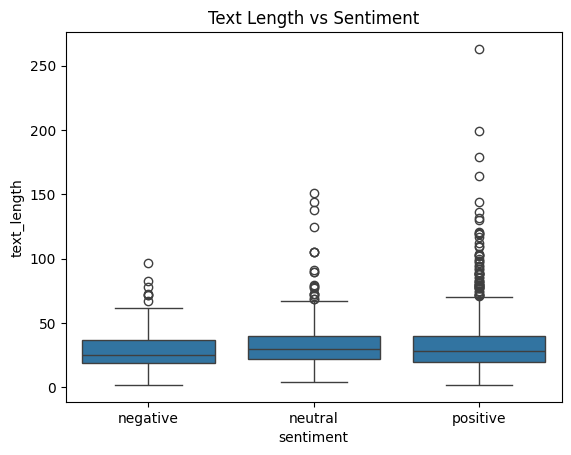

In [23]:
df['text_length'] = df['processed_text'].apply(lambda x: len(x.split()))

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.show()

sns.boxplot(x='sentiment', y='text_length', data=df)
plt.title('Text Length vs Sentiment')
plt.show()

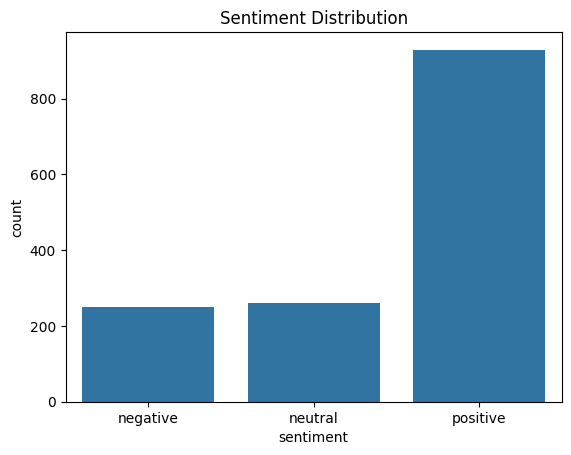

In [24]:
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

In [25]:
def contains_emoji(text):
    return any(char in emoji.EMOJI_DATA for char in text)

# Filter rows that still contain emojis
emoji_rows = df[df['processed_text'].progress_apply(contains_emoji)]
print("Number of rows still containing emojis:", len(emoji_rows))
print(emoji_rows[['processed_text']])

100%|███████████████████████████████████████████████████████████████████████████| 1440/1440 [00:00<00:00, 16718.75it/s]

Number of rows still containing emojis: 0
Empty DataFrame
Columns: [processed_text]
Index: []


In [26]:
!pip install langdetect


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
from langdetect import detect, DetectorFactory
DetectorFactory.seed = 0  # for reproducibility

def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False  # in case of empty text or detection error

# Check which rows are not English
non_english_rows = df[df['processed_text'].progress_apply(lambda x: not is_english(x))]

print("Number of non-English rows:", len(non_english_rows))
print(non_english_rows[['processed_text']])

100%|██████████████████████████████████████████████████████████████████████████████| 1440/1440 [00:26<00:00, 54.03it/s]

Number of non-English rows: 21
                                         processed_text
1      camera quality like megapixel camera quality low
21                             poor performance dislike
22          bad self camera self camera like mega pixel
61                            samsung love samsung beat
82    performance price dis price u afford doubtover...
299                                       prepared good
457   awesome phone thanks amazon love samsung ab ja...
521                     samsung mobile best best mobile
604          great deal got great deal gb ram gb memory
823   phone gyroscope phone good complaint phone mis...
1009  great deal little caveat great deal price does...
1068                 buying compromise excellent mobile
1089  original product superb excellent deliveryno d...
1106                                          good like
1137           excellent mobile price good mobile price
1198             good product nice looking nice working
1215  nice mobile

In [28]:
df.head()

,title,rating,body,text,translated_text,clean_text,processed_text,sentiment,text_length
0,Horrible product,1,Very disappointed with the overall performance...,Horrible product Very disappointed with the ov...,Horrible product Very disappointed with the ov...,horrible product very disappointed with the ov...,horrible product disappointed overall performa...,negative,6
1,Camera quality is not like 48 megapixel,3,Camera quality is low,Camera quality is not like 48 megapixel Camera...,Camera quality is not like 48 megapixel Camera...,camera quality is not like megapixel camera qu...,camera quality like megapixel camera quality low,neutral,7
2,Overall,4,"Got the mobile on the launch date,Battery must...","Overall Got the mobile on the launch date,Batt...","Overall Got the mobile on the launch date,Batt...",overall got the mobile on the launch datebatte...,overall got mobile launch datebattery must app...,neutral,38
3,A big no from me,1,1. It doesn't work with 5.0GHz WiFi frequency....,A big no from me 1. It doesn't work with 5.0GH...,A big no from me 1. It doesn't work with 5.0GH...,a big no from me it doesnt work with ghz wifi ...,big doesnt work ghz wifi frequency ghz old sch...,negative,37
4,Put your money somewhere else,1,"Not worth buying....faulty software, poor disp...",Put your money somewhere else Not worth buying...,Put your money somewhere else Not worth buying...,put your money somewhere else not worth buying...,put money somewhere else worth buyingfaulty so...,neutral,27


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [31]:
from sklearn.model_selection import train_test_split

X = df['processed_text']
y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [32]:
## To balance data

In [33]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Split first
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['sentiment'], test_size=0.2, random_state=42)

# Convert text -> numerical TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Apply SMOTE on training data
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_tfidf, y_train)

print("Before SMOTE:", dict(pd.Series(y_train).value_counts()))
print("After SMOTE:", dict(pd.Series(y_train_bal).value_counts()))



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


Before SMOTE: {'positive': np.int64(749), 'neutral': np.int64(205), 'negative': np.int64(198)}
After SMOTE: {'positive': np.int64(749), 'neutral': np.int64(749), 'negative': np.int64(749)}


In [34]:
from sklearn.svm import LinearSVC
model1 = LinearSVC()
model1.fit(X_train_bal, y_train_bal)


LinearSVC()

 Test Accuracy: 0.7291666666666666

Classification Report:
              precision    recall  f1-score   support

    negative      0.641     0.788     0.707        52
     neutral      0.318     0.250     0.280        56
    positive      0.861     0.861     0.861       180

    accuracy                          0.729       288
   macro avg      0.607     0.633     0.616       288
weighted avg      0.716     0.729     0.720       288



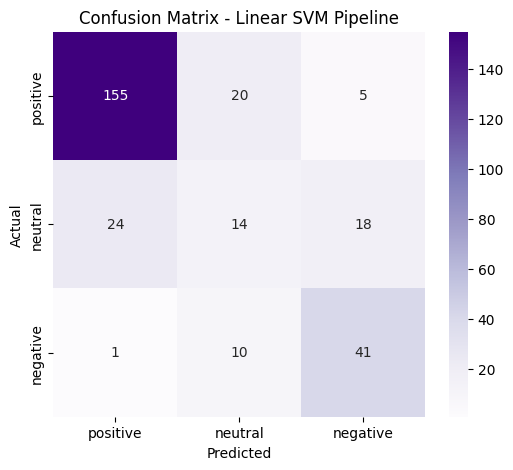

In [35]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict
y_pred = model1.predict(X_test_tfidf)

# Evaluation
print(" Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, digits=3))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'neutral', 'negative'])
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=['positive','neutral','negative'],
            yticklabels=['positive','neutral','negative'])
plt.title('Confusion Matrix - Linear SVM Pipeline')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [36]:
texts = ["Ye product Acha nahi hai.", "The movie was okay, not bad.", "Absolutely fantastic! Loved it!"]
X_test_tfidf = tfidf.transform(texts)
predictions = model1.predict(X_test_tfidf)
for t, p in zip(texts, predictions):
    print(f"{t} -> {p}")

Ye product Acha nahi hai. -> neutral
The movie was okay, not bad. -> negative
Absolutely fantastic! Loved it! -> positive


In [43]:
import pickle

pickle.dump(model1,open("model.pkl","wb"))
pickle.dump(tfidf,open ("tfidf.pkl","wb"))